In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import datetime
import os
import pandas as pd

%matplotlib inline

In [2]:
# детрендинг методом скользящего среднего. degree - окно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

In [3]:
def num_max(s):
    nmax=0
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            #Отсеивание максимумов, находящихся ниже нуля # и с очень низкой амплитудой 
            if (s[k]>0.05): #and abs(s[k]-s[k+1])<0.05:
                nmax=nmax+1
            
    return nmax

In [4]:
# автокорреляционная функция
def autocorr(y,r):
    n=len(y)
    
    y1=np.zeros(n)
    
    for i in range(n):
        
        y1[0:i]=0           #обнуление i-1 го элемента последовательности y
        y1[i:n]=y[:n-i]  #заполнение i го элемента последовательностью y (сдвиг на i)
        r[i]=np.corrcoef(y1,y)[1,0]    #вычисление коэффициентов корреляции
        #plt.plot(y1)

    del y1
    return()

In [5]:
"""directory = './2018dat/'
arr = os.listdir(directory)
arr.sort()
N = len(arr)
TEC = []
for i in range(N):
    FName = directory + arr[i]
    data = pd.read_table(FName, header = None, sep = '\s+')
    TEC.append(data)"""

"directory = './2018dat/'\narr = os.listdir(directory)\narr.sort()\nN = len(arr)\nTEC = []\nfor i in range(N):\n    FName = directory + arr[i]\n    data = pd.read_table(FName, header = None, sep = '\\s+')\n    TEC.append(data)"

In [6]:
data = np.load('TEC_np.npy')
NP_TEC = data[7:-7,:,:]
n_lat = len(NP_TEC[:,0,0])
n_long = len(NP_TEC[0,:,0])
#n_day = len(NP_TEC[0,0,:])
n_day = 28
print(n_lat, n_long)

(57, 73)


In [7]:
num_m = np.zeros(n_day*n_lat).reshape(n_lat, n_day)
data_TEC = np.zeros(n_long)
for day in range(n_day):
    for lat in range(n_lat):
        #j = 72   # Сдвиг на 90 градусов по долготе
        #data_TEC[:n_long-j] = NP_TEC[lat,j:,32+day]
        #data_TEC[n_long-j:] = NP_TEC[lat,:j,32+day]
        # Entire Earth
        data_TEC = NP_TEC[lat,:,day+32]
        #South Hemisphere
        #data_TEC = NP_TEC[35+12+lat,:,day+48]
        #North Hemisphere
        #data_TEC = NP_TEC[12+lat,:,day+48]
        Det_TEC = np.asarray(detrendS(data_TEC,5))
        Det_TEC_data = Det_TEC[5:-5]
        X = np.arange( 25, 340, 5)
        # переводим день года в дату (год, месяц, день)
        date_of_doy = datetime.datetime(2018, 1, 1) + datetime.timedelta(32 + day - 1)
        this_day = date_of_doy.day # извлекаем только день
        # Name of title and File for North Hemisphere
        #Name = str(this_day) + ' February ' + str(60 - 2.5*lat) + r'$\degree$ latitude N'
        #FileName = './Figure/fig/' + str(this_day) + '_february_' + str(60 - 2.5*lat) + 'lat_N.png'
        # Name of title and File for South Hemisphere
        Name = str(this_day) + ' February ' + str(-70 + 2.5*lat) + r'$\degree$ latitude'
        FileName = './Figure/' + str(this_day) + '_february_' + str(-70 + 2.5*lat) + 'lat.png'
        
        acor = np.zeros(len(Det_TEC_data))
        autocorr(Det_TEC_data,acor)
        
        
        
        n_m = num_max(acor)
        num_m[lat, day] = n_m
        # нормирующий член
        norma = np.sum(Det_TEC_data**2)
        # корреляционная функция
        cros_cor = np.correlate(Det_TEC_data, Det_TEC_data, 'full')/norma
        # используем только 2ю половину
        cros_cor = cros_cor[int(len(cros_cor)/2):]

        #fig, ax = plt.subplots(figsize=(15,7))

        #plt.plot(X, Det_TEC_data, linewidth = 3, label = 'Detrended TEC')

        #plt.plot(X, acor, label='autocor', linewidth = 3)

        #plt.plot(X, cros_cor, 'r', linewidth = 3, label = 'correlate')
        
        #plt.axhline(0, color ='k')
        #ax.grid()
        #ax.xaxis.set_major_locator(MultipleLocator(10))
        #ax.set_xlabel('Latitude, degree', size = 15)
        #ax.set_title(Name, size = 20)
        # размер окна легенды prop = {'size': 12}
        #ax.legend(prop={'size': 12}, title = 'number of maxima = ' + str(n_m))
        
        #plt.savefig(FileName)

/home/atim/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/atim/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [8]:
len(num_m[:,0])
#X = np.arange(17, 28, 1)
#Y = np.arange(0, 71, 1)

57

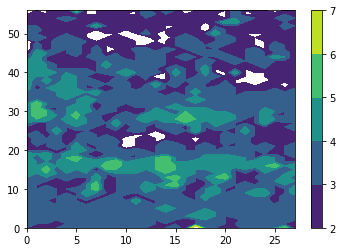

In [9]:
scale = np.arange(2, 8) # , levels = scale
plt.contourf(num_m, levels = scale)
plt.colorbar()

In [10]:
Y = np.arange(1, 29, 1)
X = np.arange(-70, 72.5, 2.5)
X_S = np.arange(-70, -7.5, 2.5)
X_N = np.arange(7.5, 70, 2.5)
print(len(num_m[32:,0]), len(X_N))

(25, 25)


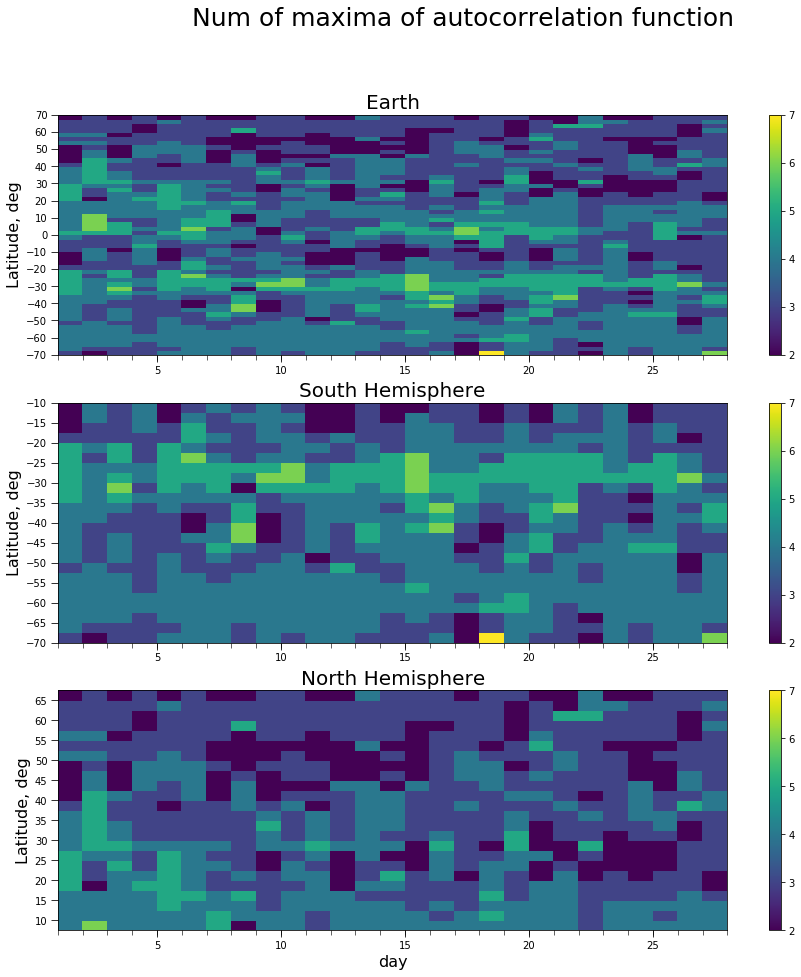

In [11]:
fig, axs = plt.subplots(3,1, figsize = (15,15))
fig.suptitle('Num of maxima of autocorrelation function', fontsize = 25)
ax = axs[0]
a = ax.pcolormesh(Y,X, num_m, vmin=2, vmax=7)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=5)
ax.set_ylabel('Latitude, deg', size=16)
ax.set_title('Earth', fontsize = 20)

fig.colorbar(a,ax = ax)

ax = axs[1]
a = ax.pcolormesh(Y,X_S, num_m[0:24,:], vmin=2, vmax=7)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=5)
ax.set_ylabel('Latitude, deg', size=16)
ax.set_title('South Hemisphere', fontsize = 20)
fig.colorbar(a,ax = ax)

ax = axs[2]
a = ax.pcolormesh(Y,X_N, num_m[32:,:], vmin=2, vmax=7)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=5)
ax.set_xlabel('day', size=16)
ax.set_ylabel('Latitude, deg', size=16)
ax.set_title('North Hemisphere', fontsize = 20)
fig.colorbar(a,ax = ax)
plt.savefig('Num_of_maxima.png')